TENSOR = multidimensional numpy array

- 0D TENSOR = SCALAR, TENSOR that contains only ONE number -> ndim=0
    
    e.g. np.array(14)


    RANK => the NUMBER of AXES (=DIMENSIONS) of a tensor
    
    Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis e.g. 3D tensor example     has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ()

- 1D TENSOR = VECTOR, an array of numbers ndim=1

    e.g. np.array([4,14,2,13,5,9])
    
- 2D TENSOR = MATRIX, 2 axes =. ROWS & COLUMNS

- 3D TENSOR - matrices packed in new array


TENSOR OPERATIONS:

1) ELEMENT WISE OPERATIONS (relu()->max())
2) BROADCASTING => tensors with different shapes:

- Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
- The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

3) DOT:

a = np.array([[1,2],[3,4]]) 

b = np.array([[11,12],[13,14]]) 

[[1 * 11+2 * 13, 1 * 12+2 * 14],[3 * 11+4 * 13, 3 * 12+4 * 14]]

4) RESHAPING

In [19]:
t=np.arange(12).reshape(3,4)
t

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [11]:
import numpy as np

np.unique(train_labels) # labels are digits from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
from keras import models
from keras import layers

# 1) NETWORK:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  # first layer
network.add(layers.Dense(10, activation='softmax'))   # second and the last layer, 
# 10 => it will return an array of 10 probability scores, each score will be the probability that the current digit 
# image belongs to one of our 10 digit classes

2) COMPILATION:

* A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction; it implements a specific variant of stochastic gradient descent (SGD)

* An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.

* Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [15]:
# Compilation:
network.compile(optimizer='rmsprop',  # loss function
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
# 3) Preparing the image data => reshaping to (6000, 28*28) and scaling ( from 0 to 1):
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
train_images.shape

(60000, 784)

In [30]:
# 4) Preparing the labels - categorically encoding:
from tensorflow.keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [31]:
# training network:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2552 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1052 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0691 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0387 - accuracy: 0.9888


In [32]:
# testing:
loss, accuracy=network.evaluate(test_images, test_labels)
print('Test accuracy: ', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9792
Test accuracy:  0.979200005531311


gap between training accuracy and test accuracy: training 0.9888 test: 0.9792 = OVERFITTING:
machine-learning models tend to perform worse on new data than on their training data

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f'Shape = {train_images.shape} and data type = {train_images.dtype}')
# 60000 matrices of 28x8 integers (each such matrix is a greyscale image with coefficients between 0-255)

Shape = (60000, 28, 28) and data type = uint8


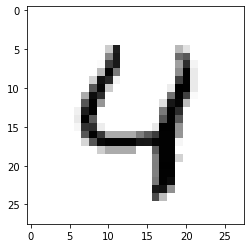

In [7]:
import matplotlib.pyplot as plt
number=test_images[4]
plt.imshow(number, cmap='binary')

In [ ]:
# timeseries -> 3D tensor (samples, features, timesteps)
# picture -> 3D tensor (heigh, width, color -> 1 if grey, 3 color), 4D if batch (btach_size, heigh, width, color)
# video -> 4D tensor, a sequence of frames, each frame being a color image (frames, height, width, color), 5D if batch  
#           (samples, frames, height, width, color)

GRADIENT BASED OPTIMIZATION:

DERIVATIVE -> The SLOPE 'a' is called the derivative of 'f' in a certain point 'p'. If 'a' is negative, it means a small change
of 'x' around 'p' will result in a decrease of f(x) and if a is positive, a small change in x will result in an increase of f(x). Further, the absolute value of a (the magnitude of the derivative) tells how quickly this increase or decrease
will happen.


GRADIENT -> is the derivative of a tensor operation; to decrease loss, the weights should be updated in the opposite direction from the gradient

CHAINS -> A neural network function consists of many tensor operations chained together, each of which has a simple, known derivative. Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers applying the chain rule to compute the contribution that each parameter had in the loss value.

In [ ]:
# There are two ways to define a model: using the Sequential class (only for linear stacks of layers, which is the most common 
# network architecture by far) or the functional API
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))  # input shape will adjust automatically based on previous layer.

# compilation step (configuration):
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)